# Time Series HW

## 1.What scale of measurement applies to timeseries data? Is timeseries data continuous or discrete? Why?


* Time series data falls under **interval** scale of measurement, because there’s no meaningful zero. The difference in time is known and easily calculated.


* A time series is continuous when observations are made continuously through time. A time series is discrete when observations are taken at specific times.


## 2.What does ARIMA stand for? Break down and explain each piece in the name.


**ARIMA - AutoRegressive Integrated MovingAverage** 


* The main goal of time series model is to predict or forecast the future values. ARIMA is one of time series model to do that. ARIMA comes from combining AR and MA models. AR(autoregression) method takes past values to predict the future ones. MA (Moving average) takes past and present errors to predict future values.


* A model with a dth difference to fit and ARMA(p,q) model is called an ARIMA process of order (p,d,q). If no differencing is involved in the model, then it becomes simply an ARMA. 

## 3.Using the data in the temperatures/ folder. Write a function that efficiently converts every column to a different temperature scale: one that is more common than Kelvin.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
temperature_df=pd.read_csv('temperatures/temperature.csv',parse_dates=['datetime'])
temperature_df.tail()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
45248,2017-11-29 20:00:00,NaN,282.00,NaN,280.82,293.55,292.15,289.54,294.71,285.72,...,290.24,NaN,275.13,288.08,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,282.89,NaN,281.65,295.68,292.74,290.61,295.59,286.45,...,289.24,NaN,274.13,286.02,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,283.39,NaN,282.75,295.96,292.58,291.34,296.25,286.44,...,286.78,NaN,273.48,283.94,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,283.02,NaN,282.96,295.65,292.61,292.15,297.15,286.14,...,284.57,NaN,272.48,282.17,NaN,NaN,NaN,NaN,NaN,NaN
45252,2017-11-30 00:00:00,NaN,282.28,NaN,283.04,294.93,291.40,291.64,297.15,284.70,...,283.42,NaN,271.80,280.65,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#creating a function to convert temperature values into Celcius.

def f(x):
    x = x-273.15
    return x

In [5]:
#using .apply() calling the function 
celsius=temperature_df.iloc[:,1:37].apply(f, axis=1).round(2)
celsius.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35.95,NaN,NaN,NaN
1,11.48,8.93,16.33,8.65,18.72,18.38,20.26,23.45,11.97,11.46,...,12.48,15.07,12.68,14.02,34.44,32.32,37.43,31.25,31.25,30.35
2,11.48,8.93,16.32,8.65,18.72,18.38,20.25,23.46,12.00,11.46,...,12.51,15.10,12.68,14.04,34.44,31.16,37.35,31.25,31.25,30.35
3,11.48,8.94,16.31,8.64,18.71,18.39,20.24,23.48,12.08,11.45,...,12.61,15.18,12.70,14.08,34.24,31.13,37.26,31.25,31.25,30.35
4,11.47,8.95,16.30,8.63,18.71,18.40,20.23,23.50,12.16,11.44,...,12.70,15.26,12.71,14.13,34.00,31.09,37.18,31.25,31.25,30.35


In [6]:
#concatenating two dfs, setting axis =1 helps to concatenate horizontically. If we aren't using axis parameter, 
#concatenation will be done in stack manner.

celcius_df=pd.concat([celsius,temperature_df['datetime']], axis=1)
#celcius_df= celcius_df.set_index('datetime')
celcius_df.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,datetime
45248,NaN,8.85,NaN,7.67,20.40,19.00,16.39,21.56,12.57,16.41,...,NaN,1.98,14.93,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-29 20:00:00
45249,NaN,9.74,NaN,8.50,22.53,19.59,17.46,22.44,13.30,17.55,...,NaN,0.98,12.87,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-29 21:00:00
45250,NaN,10.24,NaN,9.60,22.81,19.43,18.19,23.10,13.29,16.56,...,NaN,0.33,10.79,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-29 22:00:00
45251,NaN,9.87,NaN,9.81,22.50,19.46,19.00,24.00,12.99,16.02,...,NaN,-0.67,9.02,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-29 23:00:00
45252,NaN,9.13,NaN,9.89,21.78,18.25,18.49,24.00,11.55,12.03,...,NaN,-1.35,7.50,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-30 00:00:00


## 4.Write a function that efficiently fills in missing values in every column, excluding trailing NANs. That is: if there's temperature data on either side of a timestamp, it should interpolate through it. But if data stopped being collected, your function should leave nans at the end.


In [7]:
#creating a function that fills in missing values, excluding trailing NANs
def interpolate(y):
    for i in y:
        if i!="datetime":
            y[i]= y[i].interpolate(method='pad',axis=0,limit_area='inside')


In [8]:
 #calling function for celsius df           
interpolate(celcius_df)
celcius_df

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,datetime
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,35.95,NaN,NaN,NaN,2012-10-01 12:00:00
1,11.48,8.93,16.33,8.65,18.72,18.38,20.26,23.45,11.97,11.46,...,15.07,12.68,14.02,34.44,32.32,37.43,31.25,31.25,30.35,2012-10-01 13:00:00
2,11.48,8.93,16.32,8.65,18.72,18.38,20.25,23.46,12.00,11.46,...,15.10,12.68,14.04,34.44,31.16,37.35,31.25,31.25,30.35,2012-10-01 14:00:00
3,11.48,8.94,16.31,8.64,18.71,18.39,20.24,23.48,12.08,11.45,...,15.18,12.70,14.08,34.24,31.13,37.26,31.25,31.25,30.35,2012-10-01 15:00:00
4,11.47,8.95,16.30,8.63,18.71,18.40,20.23,23.50,12.16,11.44,...,15.26,12.71,14.13,34.00,31.09,37.18,31.25,31.25,30.35,2012-10-01 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,NaN,8.85,NaN,7.67,20.40,19.00,16.39,21.56,12.57,16.41,...,NaN,1.98,14.93,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-29 20:00:00
45249,NaN,9.74,NaN,8.50,22.53,19.59,17.46,22.44,13.30,17.55,...,NaN,0.98,12.87,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-29 21:00:00
45250,NaN,10.24,NaN,9.60,22.81,19.43,18.19,23.10,13.29,16.56,...,NaN,0.33,10.79,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-29 22:00:00
45251,NaN,9.87,NaN,9.81,22.50,19.46,19.00,24.00,12.99,16.02,...,NaN,-0.67,9.02,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-29 23:00:00


## 5.Find all cities A and B where city A is warmer than city B in the summer, but also colder than city B in the winter, on average.


In [9]:
# separating months from the datetime index
celcius_df['datetime']= pd.to_datetime(celcius_df['datetime'], errors='coerce')
celcius_df['month']= pd.DatetimeIndex(celcius_df['datetime']).month
celcius_df.head()


,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,datetime,month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,35.95,NaN,NaN,NaN,2012-10-01 12:00:00,10
1,11.48,8.93,16.33,8.65,18.72,18.38,20.26,23.45,11.97,11.46,...,12.68,14.02,34.44,32.32,37.43,31.25,31.25,30.35,2012-10-01 13:00:00,10
2,11.48,8.93,16.32,8.65,18.72,18.38,20.25,23.46,12.00,11.46,...,12.68,14.04,34.44,31.16,37.35,31.25,31.25,30.35,2012-10-01 14:00:00,10
3,11.48,8.94,16.31,8.64,18.71,18.39,20.24,23.48,12.08,11.45,...,12.70,14.08,34.24,31.13,37.26,31.25,31.25,30.35,2012-10-01 15:00:00,10
4,11.47,8.95,16.30,8.63,18.71,18.40,20.23,23.50,12.16,11.44,...,12.71,14.13,34.00,31.09,37.18,31.25,31.25,30.35,2012-10-01 16:00:00,10


In [10]:
#I have created summer months and winter months list. 
x=celcius_df
summer_months= [5,6,7,8,9]
winter_months=[10,11,12,1,2,3,4]
x[x.month.isin(summer_months)]

#Calculated averages for cities during summer months.
avg_summer = x[x.month.isin(summer_months)].iloc[:,0:36].mean().round(2)
avg_summer

Vancouver            16.67
Portland             17.98
San Francisco        18.20
Seattle              16.84
Los Angeles          21.59
San Diego            20.39
Las Vegas            28.69
Phoenix              30.65
Albuquerque          20.55
Denver               18.29
San Antonio          26.89
Dallas               27.02
Houston              27.06
Kansas City          22.81
Minneapolis          19.08
Saint Louis          22.92
Chicago              19.81
Nashville            23.50
Indianapolis         21.17
Atlanta              23.79
Detroit              19.70
Jacksonville         26.34
Charlotte            23.35
Miami                27.69
Pittsburgh           19.75
Toronto              18.37
Philadelphia         21.17
New York             21.22
Montreal             18.12
Boston               19.26
Beersheba            23.89
Tel Aviv District    26.57
Eilat                30.15
Haifa                27.11
Nahariyya            25.48
Jerusalem            25.48
dtype: float64

In [11]:
#Calculated averages for cities during winter months.
avg_winter =x[x.month.isin(winter_months)].iloc[:,0:36].mean().round(2)
avg_winter


Vancouver             6.52
Portland              7.65
San Francisco        12.76
Seattle               7.45
Los Angeles          15.04
San Diego            14.79
Las Vegas            12.85
Phoenix              16.67
Albuquerque           6.95
Denver                3.82
San Antonio          16.36
Dallas               13.90
Houston              16.95
Kansas City           7.13
Minneapolis          -0.33
Saint Louis           7.11
Chicago               3.64
Nashville             9.90
Indianapolis          5.11
Atlanta              11.73
Detroit               3.08
Jacksonville         17.66
Charlotte            10.56
Miami                23.16
Pittsburgh            4.87
Toronto               2.25
Philadelphia          6.12
New York              5.94
Montreal             -0.27
Boston                4.74
Beersheba            14.49
Tel Aviv District    17.70
Eilat                18.56
Haifa                18.61
Nahariyya            17.75
Jerusalem            16.20
dtype: float64

In [13]:
#created dataframe with the average values and cities
average_df=pd.DataFrame(avg_summer)
average_df.columns=['summer_avg']
average_df['winter_avg']=avg_winter
average_df=average_df.reset_index()
average_df.columns=['city','summer_avg','winter_avg']
average_df

,city,summer_avg,winter_avg
0,Vancouver,16.67,6.52
1,Portland,17.98,7.65
2,San Francisco,18.20,12.76
3,Seattle,16.84,7.45
4,Los Angeles,21.59,15.04
5,San Diego,20.39,14.79
6,Las Vegas,28.69,12.85
7,Phoenix,30.65,16.67
8,Albuquerque,20.55,6.95
9,Denver,18.29,3.82


In [14]:
#Iterated inside the average df and compared which the city temp is greater in summer and for the same city temp 
#is less than in winter and print the results.
cityA=[]
cityB=[]

for i in range(len(average_df['city'])):
    city=average_df.iloc[i,0]
    summer_temp=average_df.iloc[i,1]
    winter_temp=average_df.iloc[i,2]
    for j in range(len(average_df['city'])):
        if city!=average_df.iloc[j,0]:
            if (summer_temp>average_df.iloc[j,1]) & (winter_temp<average_df.iloc[j,2]):
                cityA.append(city)
                cityB.append(average_df.iloc[j,0])
                print(city," temperature ",summer_temp," is hotter than ",average_df.iloc[j,0],average_df.iloc[j,1])
                print(city," temperature ",winter_temp," is colder than ",average_df.iloc[j,0],average_df.iloc[j,2])


Las Vegas  temperature  28.69  is hotter than  Los Angeles 21.59
Las Vegas  temperature  12.85  is colder than  Los Angeles 15.04
Las Vegas  temperature  28.69  is hotter than  San Diego 20.39
Las Vegas  temperature  12.85  is colder than  San Diego 14.79
Las Vegas  temperature  28.69  is hotter than  San Antonio 26.89
Las Vegas  temperature  12.85  is colder than  San Antonio 16.36
Las Vegas  temperature  28.69  is hotter than  Dallas 27.02
Las Vegas  temperature  12.85  is colder than  Dallas 13.9
Las Vegas  temperature  28.69  is hotter than  Houston 27.06
Las Vegas  temperature  12.85  is colder than  Houston 16.95
Las Vegas  temperature  28.69  is hotter than  Jacksonville 26.34
Las Vegas  temperature  12.85  is colder than  Jacksonville 17.66
Las Vegas  temperature  28.69  is hotter than  Miami 27.69
Las Vegas  temperature  12.85  is colder than  Miami 23.16
Las Vegas  temperature  28.69  is hotter than  Beersheba 23.89
Las Vegas  temperature  12.85  is colder than  Beersheba 14.

Toronto  temperature  18.37  is hotter than  Vancouver 16.67
Toronto  temperature  2.25  is colder than  Vancouver 6.52
Toronto  temperature  18.37  is hotter than  Portland 17.98
Toronto  temperature  2.25  is colder than  Portland 7.65
Toronto  temperature  18.37  is hotter than  San Francisco 18.2
Toronto  temperature  2.25  is colder than  San Francisco 12.76
Toronto  temperature  18.37  is hotter than  Seattle 16.84
Toronto  temperature  2.25  is colder than  Seattle 7.45
Toronto  temperature  18.37  is hotter than  Denver 18.29
Toronto  temperature  2.25  is colder than  Denver 3.82
Philadelphia  temperature  21.17  is hotter than  Vancouver 16.67
Philadelphia  temperature  6.12  is colder than  Vancouver 6.52
Philadelphia  temperature  21.17  is hotter than  Portland 17.98
Philadelphia  temperature  6.12  is colder than  Portland 7.65
Philadelphia  temperature  21.17  is hotter than  San Francisco 18.2
Philadelphia  temperature  6.12  is colder than  San Francisco 12.76
Philadel

In [15]:
#creating daraftrame for the cities
list_of_tuples = list(zip(cityA, cityB)) 
cities_df = pd.DataFrame(list_of_tuples,columns = ['CityA', 'CityB'])
cities_df

,CityA,CityB
0,Las Vegas,Los Angeles
1,Las Vegas,San Diego
2,Las Vegas,San Antonio
3,Las Vegas,Dallas
4,Las Vegas,Houston
...,...,...
118,Beersheba,Los Angeles
119,Beersheba,San Diego
120,Tel Aviv District,Nahariyya
121,Eilat,Miami


## 6.For two of the cities you found in question 5 (there are many possible answers), clean up the data via rolling averages and plot a clear visual. Explain how rolling average differs from moving average (MA) model.


In [234]:
#Taking Dallas and Kansas City to perform rolling averages
rolling_df= celcius_df.loc[:,['Dallas','Kansas City']] 
rolling_df

,Dallas,Kansas City
datetime,,
2012-10-07,20.638968,14.730516
2012-10-14,18.527857,11.868929
2012-10-21,19.877202,14.732024
2012-10-28,20.378333,15.948393
2012-11-04,16.844345,8.740774
...,...,...
2017-11-05,18.878036,7.655655
2017-11-12,13.846786,3.944524
2017-11-19,18.381012,9.155893


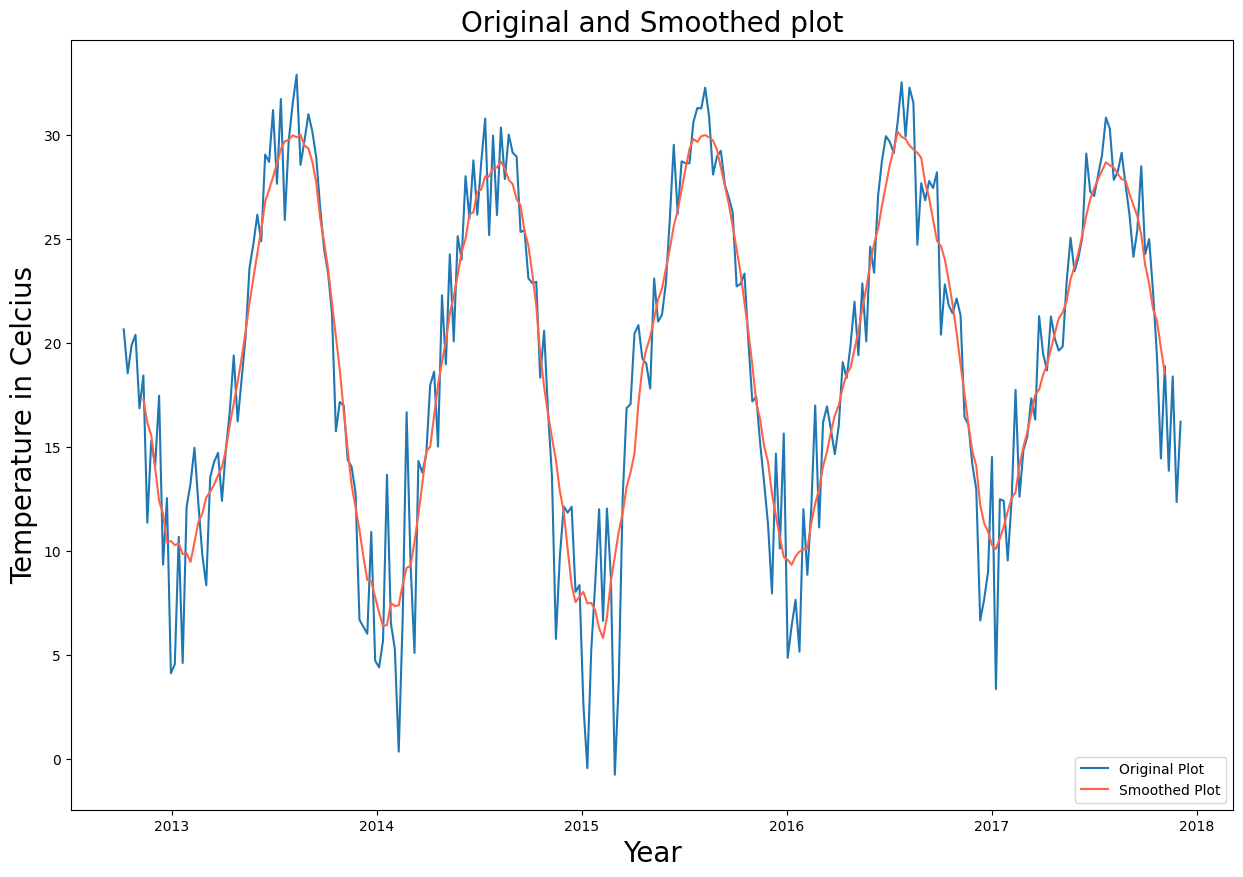

In [239]:
#window defines the number of raw observations used to calculate the moving average value.
rolling_df['rolling_dallas'] = rolling_df['Dallas'].rolling(10,center=True).mean()
fig=plt.figure(figsize=(15,10));
ax=fig.add_subplot(111);
ax.plot(rolling_df['Dallas'],label='Original Plot')
ax.plot(rolling_df['rolling_dallas'],label='Smoothed Plot',c='tomato')
ax.legend(loc='lower right')
ax.set_title('Original and Smoothed plot')
ax.set_xlabel('Year')
ax.title.set_size(20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.set_ylabel('Temperature in Celcius');

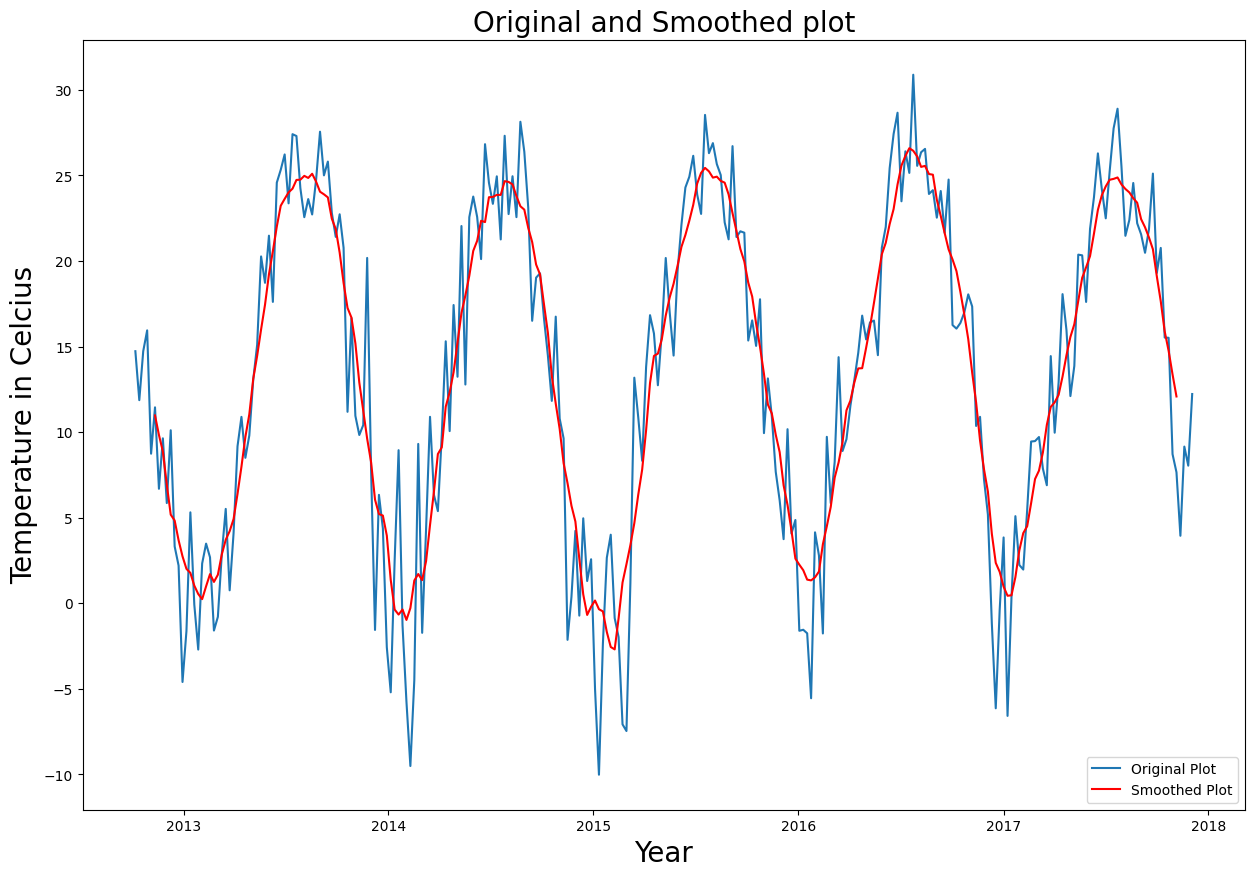

In [241]:
rolling_df['rolling_kansas'] = rolling_df['Kansas City'].rolling(10,center=True).mean()
fig=plt.figure(figsize=(15,10));
ax=fig.add_subplot(111);
ax.plot(rolling_df['Kansas City'],label='Original Plot')
ax.plot(rolling_df['rolling_kansas'],label='Smoothed Plot',c='r')
ax.legend(loc='lower right')
ax.set_title('Original and Smoothed plot')
ax.set_xlabel('Year')
ax.title.set_size(20)
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.set_ylabel('Temperature in Celcius');

In [319]:
# From the plot we can see how rolling average smoothens our data. 


### Explain how rolling average differs from moving average (MA) model.

* MA model uses past and current errors to estimate the current value. Moving average follows the prevailing trend,smooth the normal fluctuations of the data.

* A Rolling Moving Average is an additional type of Moving Average. This method gives recent values most weighting and less weighting further back in time. The main purpose of this function is smoothing out the function. 

* Compare to other average types like MA(Moving AVerage),EMA(Exponentionally Moving Average), Rolling Moving Average appears to be smoothest when plotted the graph.

## 7.Perform SARIMA on five cities, iterating through the cities programmatically. Explain your results. Graph the predicted values 30 days out.


In [98]:
#celcius_df= celcius_df.set_index('datetime')
celcius_df= celcius_df.resample('W').mean()
celcius_df

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem,month
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-07,11.858000,14.286968,19.254129,12.214710,21.493548,21.349935,26.089290,27.728000,17.853226,9.831613,...,18.601806,14.059806,16.653742,27.714774,27.492000,29.464295,27.155419,27.146323,26.247290,10.000000
2012-10-14,11.570893,12.492321,15.026310,12.884881,18.363512,18.788214,20.792560,24.593333,13.178512,9.010357,...,10.713095,7.530595,9.970774,26.290179,25.037440,27.189345,25.149583,25.149583,24.204524,10.000000
2012-10-21,10.766726,12.581905,18.237738,11.862738,21.791369,21.251429,20.793393,24.469345,14.418988,12.702262,...,14.390179,9.843393,13.090893,26.595774,25.478810,28.952440,26.465179,26.465179,26.013810,10.000000
2012-10-28,6.520476,7.938750,13.921429,7.239107,19.241964,17.976548,17.902917,22.128095,11.878036,7.691071,...,14.491964,9.430595,11.532024,24.897500,23.385357,24.985417,23.948214,23.948214,22.745357,10.000000
2012-11-04,10.706786,13.579643,14.973929,12.447679,17.534167,17.293095,17.326310,21.392500,11.461786,10.028036,...,10.768929,9.825060,11.412976,25.414762,23.994583,25.809107,25.580298,25.580298,24.528036,10.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-05,NaN,8.877857,NaN,6.457857,17.781964,17.187083,19.435536,21.245893,12.067560,6.259107,...,NaN,7.457857,12.218274,NaN,NaN,NaN,NaN,NaN,NaN,10.714286
2017-11-12,NaN,7.508274,NaN,6.335417,17.120952,16.244583,15.916369,20.552500,10.273571,2.393750,...,NaN,0.991071,4.989226,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
2017-11-19,NaN,8.026845,NaN,7.863452,17.656250,16.942857,14.668988,19.791607,9.685714,7.646131,...,NaN,-0.022262,4.369345,NaN,NaN,NaN,NaN,NaN,NaN,11.000000


In [186]:

sarima_df = celcius_df.loc[:,['Las Vegas','Phoenix','Denver','Minneapolis','Chicago']]


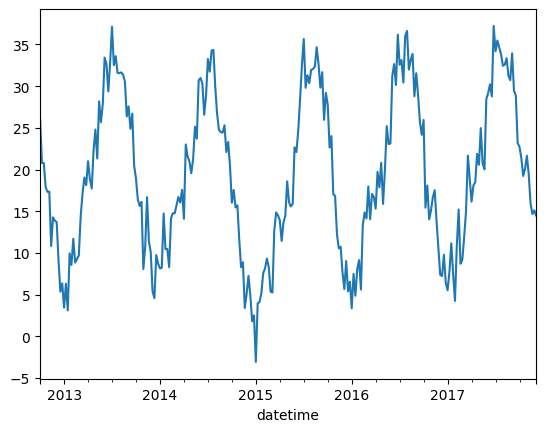

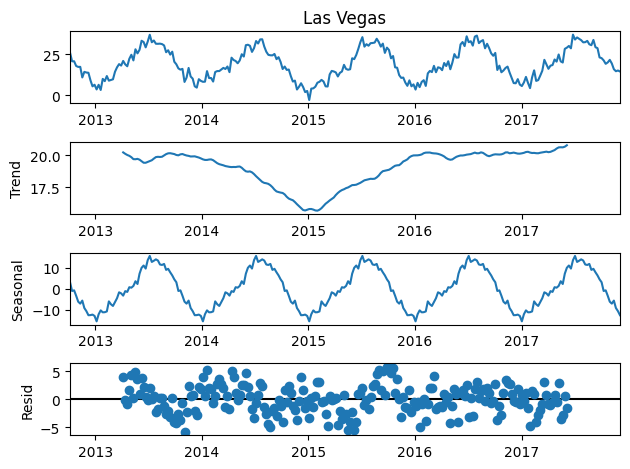

In [164]:
sarima_df['Las Vegas'].plot()
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(sarima_df['Las Vegas'])
decomp.plot();

<AxesSubplot:xlabel='datetime'>

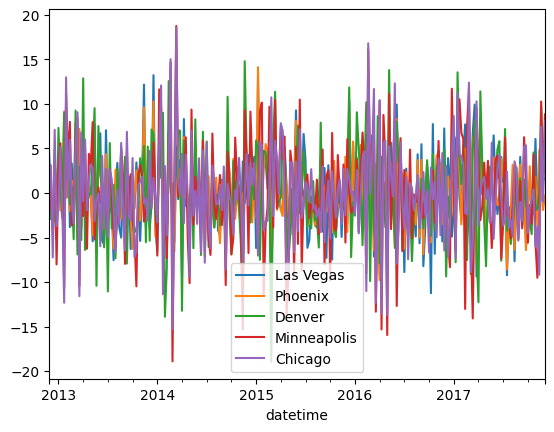

In [106]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
sarima_df.diff().diff(7).dropna().plot()

In [146]:
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

                                     SARIMAX Results                                      
Dep. Variable:                     diff_Las Vegas   No. Observations:                  262
Model:             SARIMAX(5, 1, 0)x(2, 1, 0, 26)   Log Likelihood                -705.520
Date:                            Tue, 07 Dec 2021   AIC                           1427.040
Time:                                    15:12:04   BIC                           1454.717
Sample:                                12-02-2012   HQIC                          1438.198
                                     - 12-03-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3200      0.059    -22.318      0.000      -1.436      -1.204
ar.L2         -1.3994      0.087   

                                     SARIMAX Results                                      
Dep. Variable:                       diff_Chicago   No. Observations:                  262
Model:             SARIMAX(5, 1, 0)x(2, 1, 0, 26)   Log Likelihood                -750.338
Date:                            Tue, 07 Dec 2021   AIC                           1516.676
Time:                                    15:12:31   BIC                           1544.352
Sample:                                12-02-2012   HQIC                          1527.834
                                     - 12-03-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2762      0.059    -21.628      0.000      -1.392      -1.161
ar.L2         -1.2859      0.097   

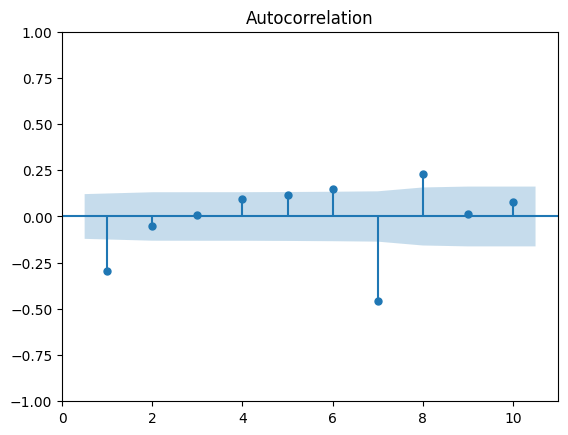

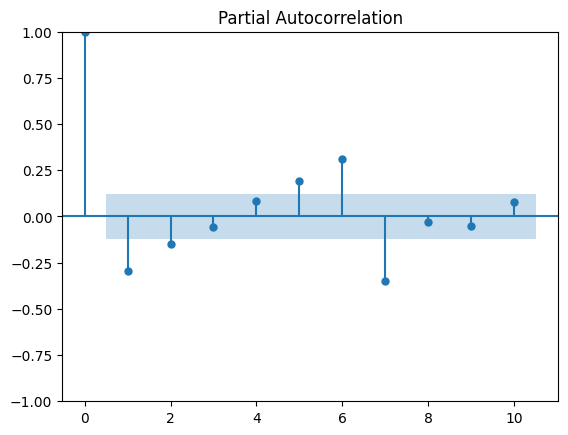

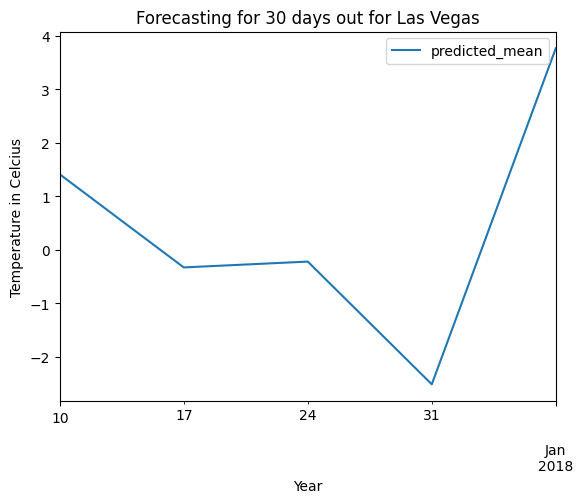

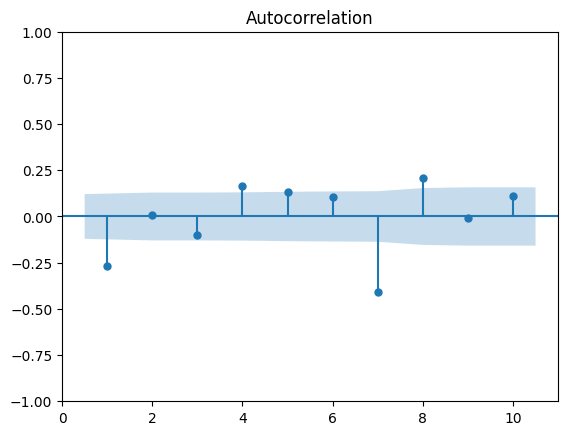

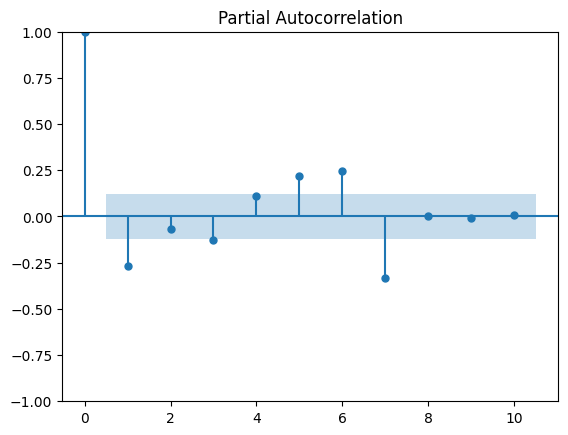

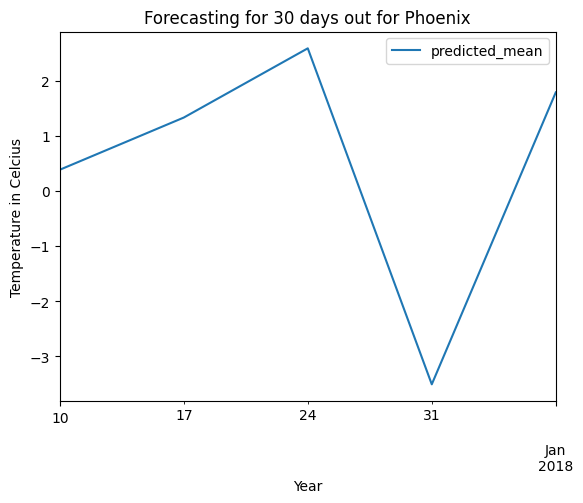

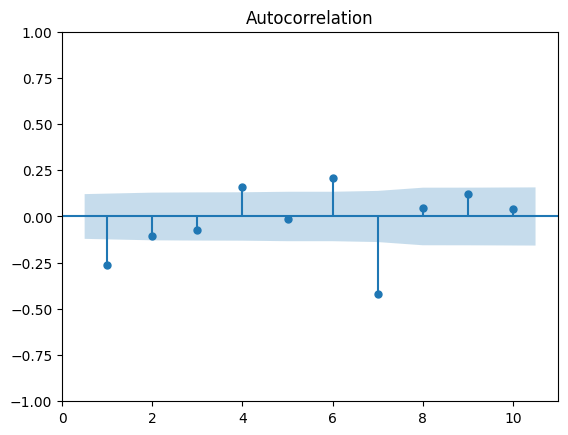

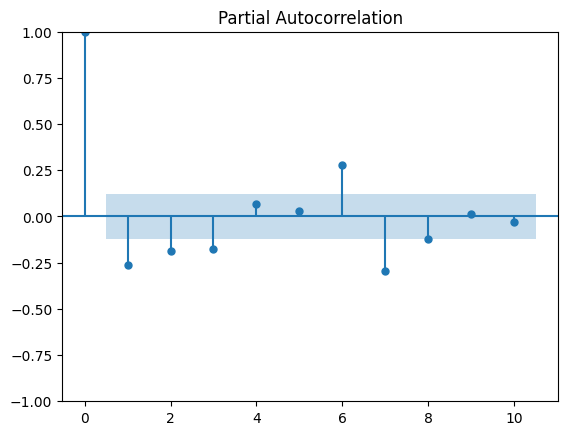

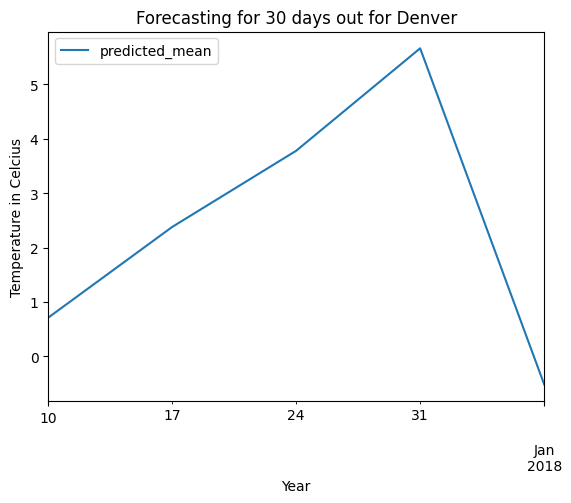

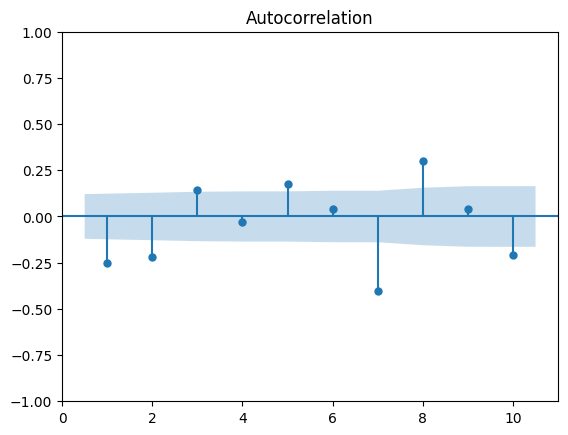

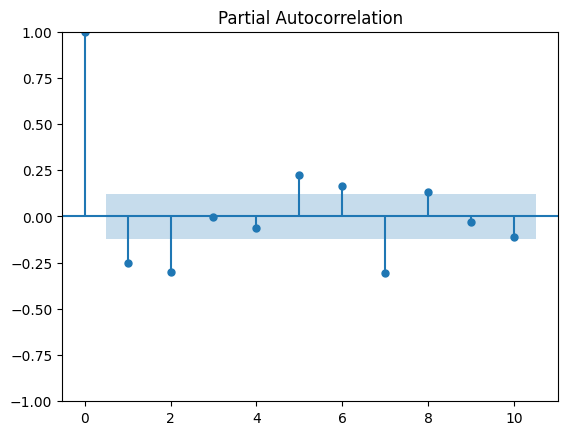

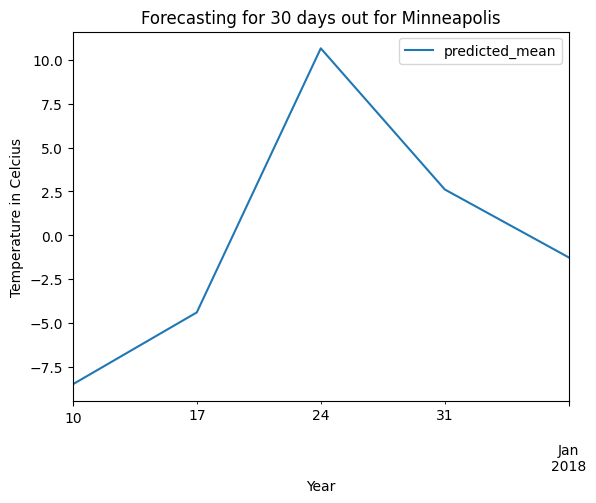

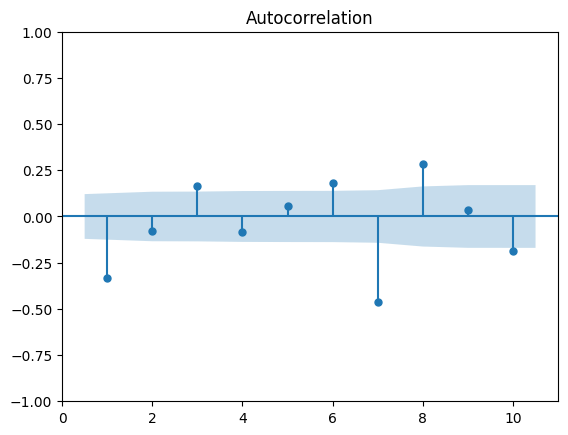

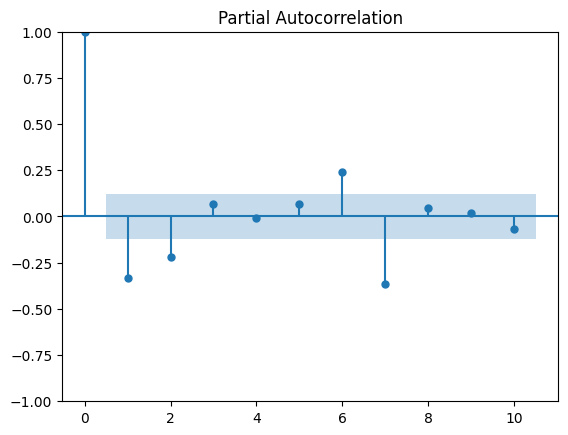

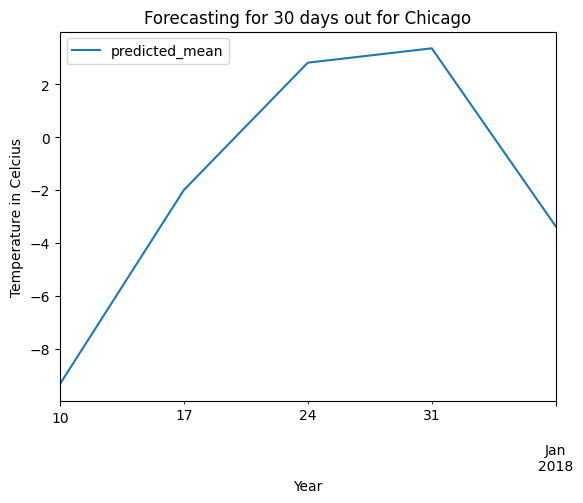

In [242]:
sarima_diff=sarima_df.copy(deep=False)

for i in sarima_df:
    plt.rcdefaults()
    sarima_diff["diff_"+i]=sarima_df[i].diff().diff(7).dropna()
    sarima_diff=sarima_diff.dropna()
    plot_acf(sarima_diff[["diff_"+i]],zero=False,lags=10,missing='drop');
    plot_pacf(sarima_diff[["diff_"+i]],lags=10,method='ywm');
    model=SARIMAX(sarima_diff["diff_"+i],order=(5,1,0),seasonal_order=(2,1,0,26))
    fitting_model=model.fit()
    print(fitting_model.summary())
    forecast_df=pd.DataFrame(fitting_model.forecast(steps=5))
    forecast_df.plot()
    plt.title("Forecasting for 30 days out for "+i)
    plt.xlabel('Year')
    plt.ylabel('Temperature in Celcius')

In [218]:
sarima_diff

,Las Vegas,Phoenix,Denver,Minneapolis,Chicago,diff_Las Vegas,diff_Phoenix,diff_Denver,diff_Minneapolis,diff_Chicago
datetime,,,,,,,,,,
2012-12-02,13.863869,17.356250,5.796667,-2.120179,2.647440,4.892267,2.233476,-1.140709,-2.247356,0.111273
2012-12-09,13.710000,16.261667,6.540476,0.969643,8.518631,-0.154702,-0.970595,-2.948095,0.105060,3.116667
2012-12-16,9.065179,11.698214,-0.612798,-4.471548,3.001607,-1.754345,-2.222202,-2.142083,-4.273333,-7.236369
2012-12-23,5.362857,10.065179,-0.481071,-5.698571,2.322679,-3.125714,-0.897440,-2.205238,4.864702,7.093869
2012-12-30,6.347321,8.742500,-5.493095,-10.982321,-0.906667,0.947917,-0.813036,-5.160000,-8.017917,-3.742202
...,...,...,...,...,...,...,...,...,...,...
2017-11-05,19.435536,21.245893,6.259107,1.322857,6.588274,-1.665833,-3.633631,-1.742738,-9.520417,-3.749405
2017-11-12,15.916369,20.552500,2.393750,-2.864107,1.827560,2.194881,4.818869,0.256845,-3.928690,-9.184762
2017-11-19,14.668988,19.791607,7.646131,0.841548,3.943274,-0.788869,0.866726,9.729940,10.269762,7.438690


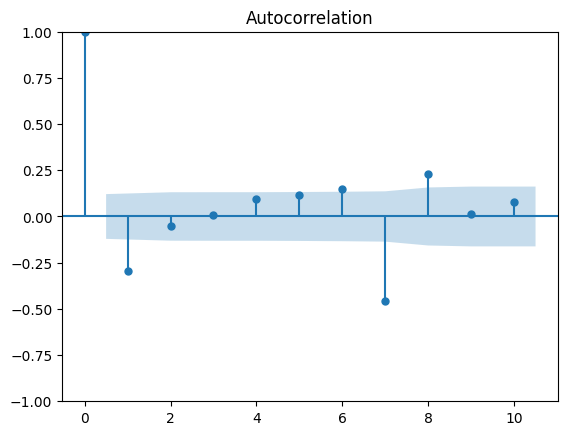

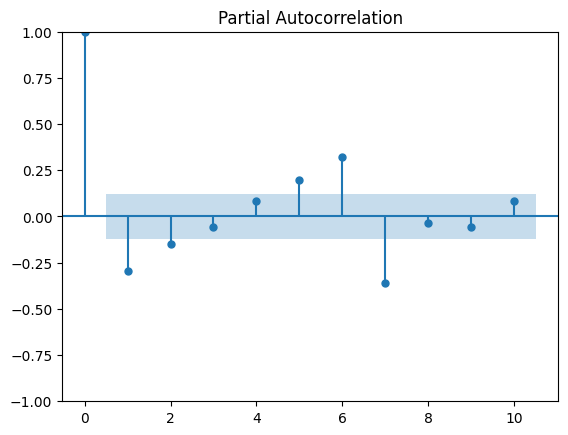

In [178]:
plot_acf(sarima_diff['diff_Las Vegas'],lags=10,missing='drop');
plot_pacf(sarima_diff['diff_Las Vegas'],lags=10);

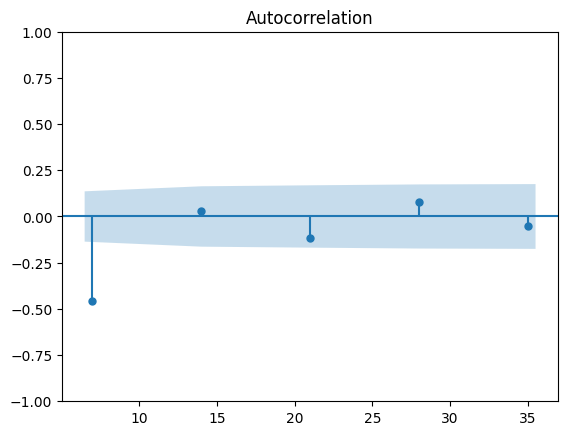

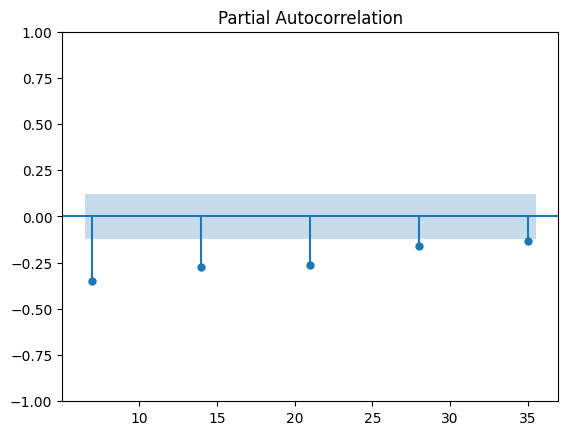

In [170]:
sarima_diff=sarima_diff.dropna()
plot_acf(sarima_diff['diff_Las Vegas'],lags=[7,14,21,28,35],missing='drop')
plot_pacf(sarima_diff['diff_Las Vegas'],lags=[7,14,21,28,35],method='ywm');

In [172]:
import pmdarima as pm
model1 = pm.auto_arima(sarima_diff['diff_Las Vegas'],
                      seasonal=True, m=26,
                      d=1, D=1,  
                      trace=True,
                      error_action='ignore') 


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[26]             : AIC=inf, Time=15.87 sec
 ARIMA(0,1,0)(0,1,0)[26]             : AIC=1794.836, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[26]             : AIC=1613.993, Time=0.87 sec
 ARIMA(0,1,1)(0,1,1)[26]             : AIC=inf, Time=5.62 sec
 ARIMA(1,1,0)(0,1,0)[26]             : AIC=1702.059, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[26]             : AIC=1590.610, Time=2.47 sec
 ARIMA(1,1,0)(2,1,1)[26]             : AIC=inf, Time=20.85 sec
 ARIMA(1,1,0)(1,1,1)[26]             : AIC=inf, Time=9.23 sec
 ARIMA(0,1,0)(2,1,0)[26]             : AIC=1668.266, Time=2.01 sec
 ARIMA(2,1,0)(2,1,0)[26]             : AIC=1546.393, Time=3.41 sec
 ARIMA(2,1,0)(1,1,0)[26]             : AIC=1566.727, Time=1.18 sec
 ARIMA(2,1,0)(2,1,1)[26]             : AIC=inf, Time=23.20 sec
 ARIMA(2,1,0)(1,1,1)[26]             : AIC=inf, Time=8.56 sec
 ARIMA(3,1,0)(2,1,0)[26]             : AIC=1504.580, Time=7.26 sec
 ARIMA(3,1,0)(1,1,0)[26]             : AIC=152

In [225]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
modelll=SARIMAX(sarima_diff['diff_Denver'],order=(5,1,0),seasonal_order=(2,1,0,26))
fitl=modelll.fit()
fitl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        diff_Denver   No. Observations:                  262
Model:             SARIMAX(5, 1, 0)x(2, 1, 0, 26)   Log Likelihood                -765.603
Date:                            Tue, 07 Dec 2021   AIC                           1547.205
Time:                                    14:44:49   BIC                           1574.882
Sample:                                12-02-2012   HQIC                          1558.363
                                     - 12-03-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1642      0.056    -20.810      0.000      -1.274      -1.055
ar.L2         -1.2485      0.086    -14.462      0.000      -1.418      -1.079
ar.L3         -1.1574      0.089    -13.070      0.000      -1.331      -0.984
ar.L4         -0.7878      0.082     -9.619      0.000      -0.948      -0.627
ar.L5         -0.4661      0.059     -7.919      0.000      -0.581      -0.351
ar.S.L26      -0.6835      0.067    -10.144      0.000      -0.816      -0.551
ar.S.L52      -0.2403      0.079     -3.030      0.002      -0.396      -0.085
sigma2        37.0599      3.209     11.548      0.000      30.770      43.350
===================================================================================
Ljung-Box (L1) (Q):                   1.47   Jarque-Bera (JB):                 5.31
Prob(Q):                              0.23   Prob(JB):                         0.07
Heteroskedasticity (H):               0.94   Skew:                            -0.27
Prob(H) (two-sided):                  0.79   Kurtosis:                         3.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

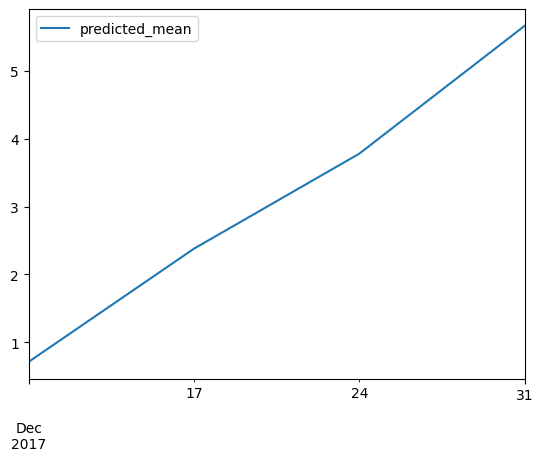

In [226]:
df1=pd.DataFrame(fitl.forecast(steps=4))
df1.plot();

## First Step: IDENTIFICATION

### Handling Missing Values

* After we imported 

### Is it stationary or not

* Its  very important to check whether the time series is stationary or not. If it is stationary only we can apply our ARMA method. 

### How to check stationarity?

    **Plot** 
        * We can plot our data to see the stationarity of our time series.

    **ADF Test**
        * We can do ADF(Augmented Dick Fuller) Test to check stationarity of a time series.

### How to convert non-stationary to stationary?
    
* If its not stationary, we can convert into stationary by taking differencing, using transforms. If its stationary, no need to do differencing, directly we can plot ACF,PACF.

    **Differencing**
    
    **transforms**


#### Plotting ACF,PACF
* From ACF,PACF plot we can find order of AR,MA models **the order of the model explains how many times lag is used.** 

### Second Step: Estimation
#### Fitting the model
* We have to find which model is best.(we can use for loop to check multiple p,q values at same time)

#### summary()
* After we fit our model, we can get our AIC,BIC values from summary. **Select the model which has low AIC value**

### Last Step: Forecasting


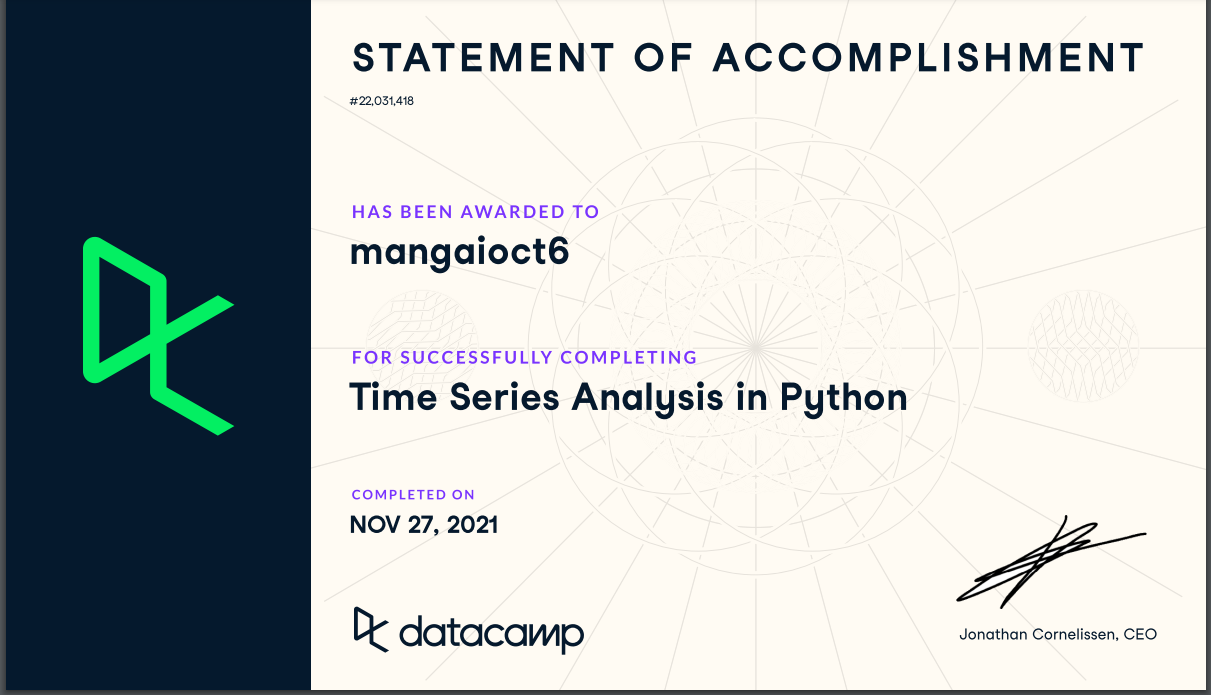